Trabajo junto Ciro Gelvez

In [1]:
#se importan las librerías Matplotlib y Numpy con animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
%matplotlib inline

In [2]:
#se definen tres variables
angulo = [math.radians(60*x) for x in range(6)] #En este paso se hace un cambio de 60 grados en cada iteración a lo largo de un circulo
sin = [math.sin(x) for x in angulo] #definimos el seno para cada ángulo
cos = [math.cos(x) for x in angulo] #definimos el coseno para cada ángulo

In [3]:
#Ahora se crean las tres funciones que me hacen moverme en un triangulo
def I(a, corre, step): 
    return (a + 1) % 6 #nos movemos a la izquierda
def D(a, corre, step):   
    return (a + 4) % 6 #nos movemos a la derecha
def A(a, corre, step): 
    corre.append((corre[-1][0] + step * cos[a], corre[-1][1] + step* sin[a])) #otra dirección
    return a

In [4]:
dictionary = dict(I=I, D=D, A=A) #se definen izquierda, derecha y otra
def snowflake(order, length, origin): #definimos el fractal, la función tendra el orden de la figura,
                                      #la longitud de la misma, y donde empieza a dibujar
    path="IADADA" 
    for i in xrange(order):
        path = path.replace("A", "AIADAIA") #con el movimiento se van generando puntos unidos por líneas rectas

    step = float(length) / (3**order) #se divide la longitud según el orden
    corre = [origin] #volvemos al origen
    a = 0
    for move in path:
        a = dictionary[move](a, corre, step) #se traducen los movimientos
        
    return corre

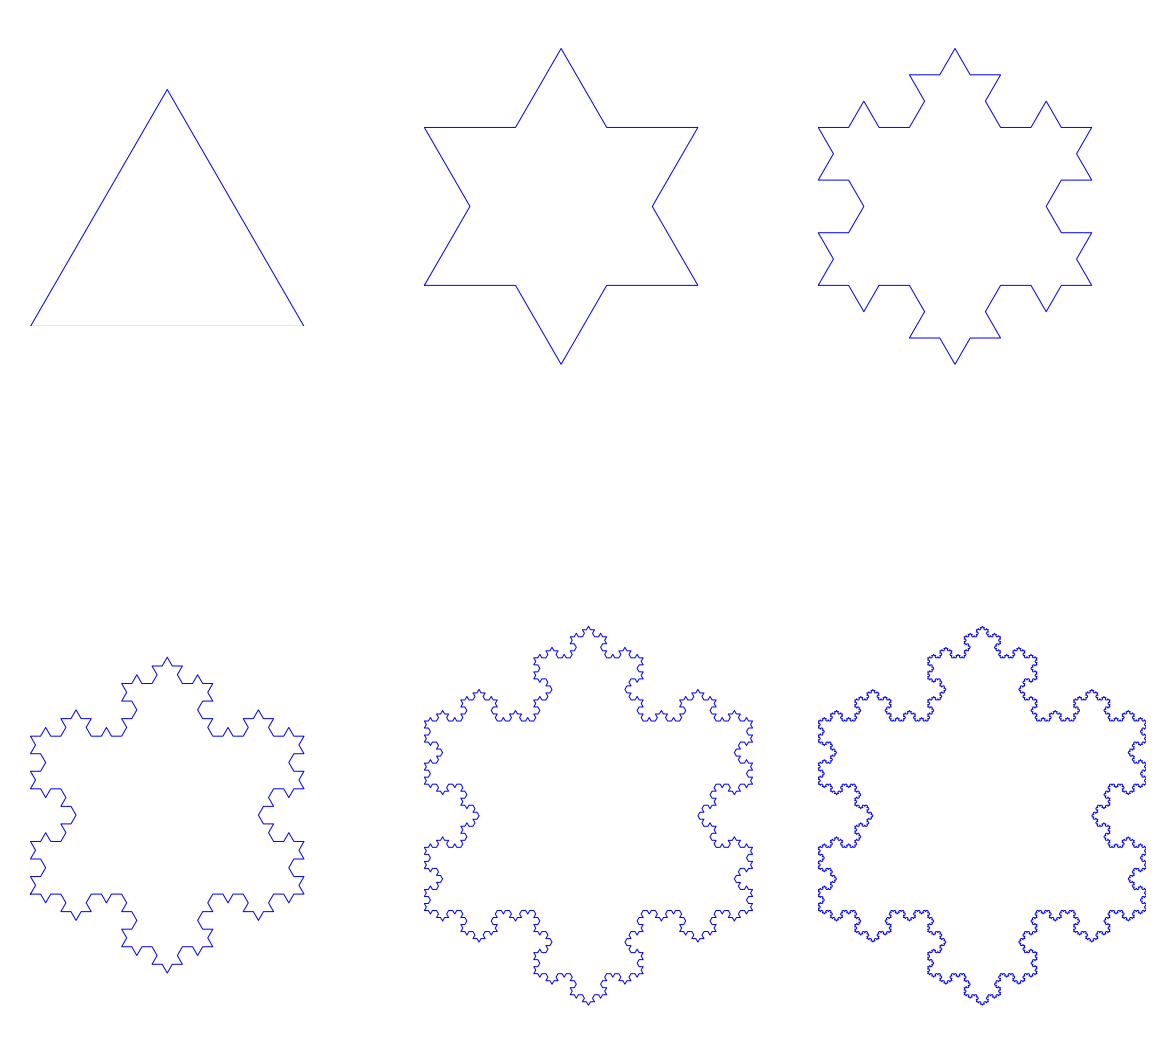

In [9]:
#Realizada el fractal procedemos a imprimirlo completamente, además de esto un panel donde se vean las 6 primeras iteraciones
plt.figure(figsize=(20,20)) #tamaño de la figura
for i in range(0,6):
    p = snowflake(i,50,(0,0)) #centrado en 0,0 y de longitud 50
    plt.subplot(2,3,i+1,aspect='equal') #se genera el panel completo con la misma longitud en los dos ejes
    plt.plot(np.asarray(p)[:,0],np.asarray(p)[:,1])
    plt.axis('off') #se quitan los ejes para mejor estética
plt.show() #se genera la figura

In [31]:
#procedemos a relizar la animación del snowflake
%matplotlib 
figure = plt.figure()
borrar = [] 
for i in range(6):
    p = snowflake(i,1000,(0,300))
    image = plt.plot(np.asarray(p)[:,0],np.asarray(p)[:,1],color='blue')
    borrar.append(image) #se borra la imagen anterior
    plt.axis('off') #se borran los ejes

animacion = animation.ArtistAnimation(figure, borrar, interval=350, blit=True,repeat_delay=500)

animacion.save('snowflake.gif',writer='imagemagick',fps=2,dpi=300) #se genera un archivo .gif para la animación.

plt.show()

Using matplotlib backend: TkAgg


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python2.7/lib-tk/Tkinter.py", line 1489, in __call__
    return self.func(*args)
  File "/usr/lib/python2.7/lib-tk/Tkinter.py", line 536, in callit
    func(*args)
  File "/usr/lib/pymodules/python2.7/matplotlib/backends/backend_tkagg.py", line 141, in _on_timer
    TimerBase._on_timer(self)
  File "/usr/lib/pymodules/python2.7/matplotlib/backend_bases.py", line 1203, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/lib/pymodules/python2.7/matplotlib/animation.py", line 876, in _step
    still_going = Animation._step(self, *args)
  File "/usr/lib/pymodules/python2.7/matplotlib/animation.py", line 735, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/lib/pymodules/python2.7/matplotlib/animation.py", line 753, in _draw_next_frame
    self._pre_draw(framedata, blit)
  File "/usr/lib/pymodules/python2.7/matplotlib/animation.py", line 942, in _pre_draw
    self._blit_clear(self._

Trabajo realizado por Ciro Gelvez y Juan Sebastian Vargas